In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [ ]:
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#        time.sleep(60)

    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | esperance
Processing Record 5 of Set 1 | hede
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | sabha
Processing Record 11 of Set 1 | mogadishu
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | faanui
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | troitskoye
Processing Record 20 of Set 1 | hofn
Processing Record 21 of Set 1 | singaraja
Processing Record 22 of Set 1 | zhigansk
Processing Record 23 of Set 1 | hermanus
Proce

Processing Record 38 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 39 of Set 4 | soyo
Processing Record 40 of Set 4 | ilhabela
Processing Record 41 of Set 4 | siguiri
Processing Record 42 of Set 4 | salalah
Processing Record 43 of Set 4 | verkhnevilyuysk
Processing Record 44 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 45 of Set 4 | samusu
City not found. Skipping...
Processing Record 46 of Set 4 | sao joao do paraiso
Processing Record 47 of Set 4 | homer
Processing Record 48 of Set 4 | taclobo
Processing Record 49 of Set 4 | itoman
Processing Record 50 of Set 4 | buala
Processing Record 1 of Set 5 | rajanpur
Processing Record 2 of Set 5 | paamiut
Processing Record 3 of Set 5 | elizabeth city
Processing Record 4 of Set 5 | cabedelo
Processing Record 5 of Set 5 | alotau
City not found. Skipping...
Processing Record 6 of Set 5 | puerto carreno
Processing Record 7 of Set 5 | ampere
Processing Record 8 of Set 5 | port keats
Processing Record 9 o

Processing Record 25 of Set 8 | lavrentiya
Processing Record 26 of Set 8 | cayenne
Processing Record 27 of Set 8 | roald
Processing Record 28 of Set 8 | quelimane
Processing Record 29 of Set 8 | samarkand
Processing Record 30 of Set 8 | gwanda
Processing Record 31 of Set 8 | vila velha
Processing Record 32 of Set 8 | guatire
Processing Record 33 of Set 8 | kumano
Processing Record 34 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 35 of Set 8 | saravan
Processing Record 36 of Set 8 | diego de almagro
Processing Record 37 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 38 of Set 8 | beringovskiy
Processing Record 39 of Set 8 | taoudenni
Processing Record 40 of Set 8 | chapais
Processing Record 41 of Set 8 | callaway
Processing Record 42 of Set 8 | port blair
Processing Record 43 of Set 8 | kamenka
Processing Record 44 of Set 8 | yatou
Processing Record 45 of Set 8 | moba
Processing Record 46 of Set 8 | guerrero negro
Processing Record 47 of Set 8 | ma

Processing Record 14 of Set 12 | tignere
Processing Record 15 of Set 12 | cabinda
Processing Record 16 of Set 12 | ardatov
Processing Record 17 of Set 12 | bairnsdale
Processing Record 18 of Set 12 | baiyin
Processing Record 19 of Set 12 | bac lieu
Processing Record 20 of Set 12 | pizarro
Processing Record 21 of Set 12 | mastic beach
Processing Record 22 of Set 12 | pokhara
Processing Record 23 of Set 12 | coari
Processing Record 24 of Set 12 | bako
Processing Record 25 of Set 12 | nieuw amsterdam
Processing Record 26 of Set 12 | chimbote
Processing Record 27 of Set 12 | betare oya
Processing Record 28 of Set 12 | kasempa
Processing Record 29 of Set 12 | cahul
Processing Record 30 of Set 12 | matehuala
Processing Record 31 of Set 12 | mogotes
Processing Record 32 of Set 12 | karla
Processing Record 33 of Set 12 | grindavik
Processing Record 34 of Set 12 | blackwater
Processing Record 35 of Set 12 | san blas
Processing Record 36 of Set 12 | panzhihua
Processing Record 37 of Set 12 | dun

In [8]:
len(city_data)

569

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,-33.79,96,75,3.67,RU,2022-01-18 23:33:19
1,Bluff,-46.6000,168.3333,58.80,74,97,15.10,NZ,2022-01-18 23:33:20
2,Esperance,-33.8667,121.9000,66.04,59,5,15.50,AU,2022-01-18 23:33:21
3,Hede,33.7681,120.2517,36.99,82,11,1.16,CN,2022-01-18 23:33:21
4,Cape Town,-33.9258,18.4232,65.08,70,20,1.01,ZA,2022-01-18 23:33:22
5,Avarua,-21.2078,-159.7750,78.85,83,100,21.85,CK,2022-01-18 23:29:12
6,Victoria,22.2855,114.1577,60.33,82,49,1.01,HK,2022-01-18 23:32:25
7,Ilulissat,69.2167,-51.1000,17.62,35,100,19.57,GL,2022-01-18 23:33:24
8,Sabha,27.0377,14.4283,52.20,52,87,7.72,LY,2022-01-18 23:33:25
9,Mogadishu,2.0371,45.3438,76.96,78,97,17.27,SO,2022-01-18 23:31:32


In [10]:
# Reorder Columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2022-01-18 23:33:19,69.7008,170.3133,-33.79,96,75,3.67
1,Bluff,NZ,2022-01-18 23:33:20,-46.6000,168.3333,58.80,74,97,15.10
2,Esperance,AU,2022-01-18 23:33:21,-33.8667,121.9000,66.04,59,5,15.50
3,Hede,CN,2022-01-18 23:33:21,33.7681,120.2517,36.99,82,11,1.16
4,Cape Town,ZA,2022-01-18 23:33:22,-33.9258,18.4232,65.08,70,20,1.01
5,Avarua,CK,2022-01-18 23:29:12,-21.2078,-159.7750,78.85,83,100,21.85
6,Victoria,HK,2022-01-18 23:32:25,22.2855,114.1577,60.33,82,49,1.01
7,Ilulissat,GL,2022-01-18 23:33:24,69.2167,-51.1000,17.62,35,100,19.57
8,Sabha,LY,2022-01-18 23:33:25,27.0377,14.4283,52.20,52,87,7.72
9,Mogadishu,SO,2022-01-18 23:31:32,2.0371,45.3438,76.96,78,97,17.27


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

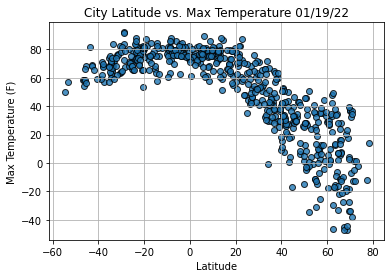

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

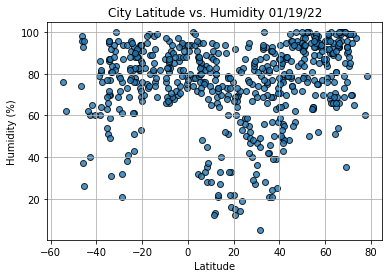

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

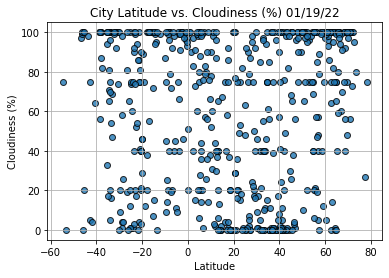

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

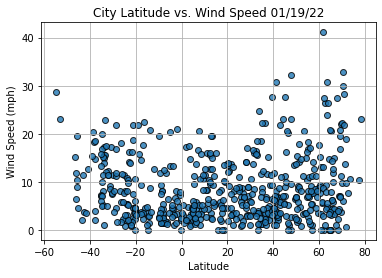

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()